### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m=np.arange(12).reshape((3,4))
dim_m=len(m)*len(m[0])
mean_row=np.sum(m,axis=1)/m.shape[1]
mean_column=np.sum(m,axis=0)/m.shape[0]
mean=np.sum(m)/dim_m
print("m = ",m)
print(f"Row mean = {mean_row}")
print(f"Column mean = {mean_column}")
print(f"Row mean = {mean}")

m =  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Row mean = [1.5 5.5 9.5]
Column mean = [4. 5. 6. 7.]
Row mean = 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
out_a=np.outer(u,v)
out_b=np.array([i*j for i in u for j in v]).reshape((len(u),len(v)))
u=u[:,np.newaxis]
out_c=u*v
print("Metodo a :\n",out_a)
print("\nMetodo b :\n",out_b)
print("\nMetodo c :\n",out_c)

Metodo a :
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Metodo b :
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Metodo c :
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
mat=np.array([np.random.random() for i in range(60)])
mat.reshape(10,6)
mat[mat<0.1]=0
print(mat)

[0.80212807 0.14599515 0.74343611 0.1784807  0.33896099 0.86546574
 0.25451985 0.85570991 0.8872607  0.40954661 0.98473136 0.74515338
 0.35068455 0.84318604 0.20607304 0.98868184 0.57039195 0.40056436
 0.46234409 0.43191826 0.8817146  0.87508252 0.87127907 0.60756581
 0.1804886  0.         0.14183642 0.94035404 0.65069767 0.7679492
 0.53591545 0.62210276 0.43786991 0.28215285 0.20732092 0.6027373
 0.80578367 0.73533321 0.44323011 0.37633925 0.86620797 0.98366832
 0.40515849 0.49609028 0.35248834 0.42226429 0.47323707 0.39143533
 0.92930627 0.73084122 0.9993314  0.83444629 0.88996585 0.52990449
 0.         0.         0.82460286 0.43782204 0.42756103 0.34106753]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

task a :  [0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]

task b :  [6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.39626

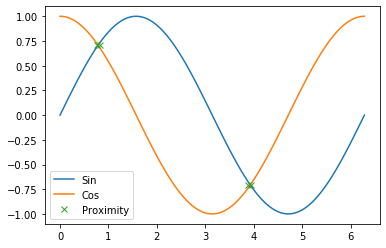

In [5]:
import matplotlib.pyplot as plt

vec=np.linspace(0,2*np.pi,100)
print("task a : ",vec[::10])
print("\ntask b : ",vec[::-1])
vec2=vec[np.abs(np.cos(vec)-np.sin(vec))<0.1]
print("\ntask c : ",vec2)

plt.plot(vec,np.sin(vec),label="Sin")
plt.plot(vec,np.cos(vec),label="Cos")
plt.plot(vec2,(np.cos(vec2)+np.sin(vec2))/2,'x',label="Proximity")
plt.legend(loc='best')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
u=np.arange(1,11)
v=np.copy(u)
u=u[:,np.newaxis]
mt=u*v

print(f"Trace = {np.trace(mt)}")
ad=[mt[i,len(mt)-1-i] for i in range(len(mt))]
print(f"Anto-diagonal = {ad}")
do=[mt[i,i+1] for i in range(len(mt)-1)]
print(f"Diagonal offset by 1 upwards = {do}")

Trace = 385
Anto-diagonal = [10, 18, 24, 28, 30, 30, 28, 24, 18, 10]
Diagonal offset by 1 upwards = [2, 6, 12, 20, 30, 42, 56, 72, 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [7]:
cities=[['Chicago','Springfield','Saint-Louis','Tulsa','Oklahoma City','Amarillo','Santa Fe','Albuquerque','Flagstaff','Los Angeles']]
cities2=[['0'],['Chicago'],['Springfield'],['Saint-Louis'],['Tulsa'],['Oklahoma City'],['Amarillo'],['Santa Fe'],['Albuquerque'],['Flagstaff'],['Los Angeles']]
r66=np.array([0,198,303,736,871,1175,1475,1544,1913,2448])
r66_2=np.copy(r66)
r66_2=r66_2[:,np.newaxis]
r66_3=np.concatenate((cities,np.abs(r66-r66_2)),axis=0)
r66_4=np.concatenate((cities2,r66_3),axis=1)
print(r66_4)

# Other visualization, without city's names
print("\n",np.abs(r66-r66_2))

[['0' 'Chicago' 'Springfield' 'Saint-Louis' 'Tulsa' 'Oklahoma City'
  'Amarillo' 'Santa Fe' 'Albuquerque' 'Flagstaff' 'Los Angeles']
 ['Chicago' '0' '198' '303' '736' '871' '1175' '1475' '1544' '1913'
  '2448']
 ['Springfield' '198' '0' '105' '538' '673' '977' '1277' '1346' '1715'
  '2250']
 ['Saint-Louis' '303' '105' '0' '433' '568' '872' '1172' '1241' '1610'
  '2145']
 ['Tulsa' '736' '538' '433' '0' '135' '439' '739' '808' '1177' '1712']
 ['Oklahoma City' '871' '673' '568' '135' '0' '304' '604' '673' '1042'
  '1577']
 ['Amarillo' '1175' '977' '872' '439' '304' '0' '300' '369' '738' '1273']
 ['Santa Fe' '1475' '1277' '1172' '739' '604' '300' '0' '69' '438' '973']
 ['Albuquerque' '1544' '1346' '1241' '808' '673' '369' '69' '0' '369'
  '904']
 ['Flagstaff' '1913' '1715' '1610' '1177' '1042' '738' '438' '369' '0'
  '535']
 ['Los Angeles' '2448' '2250' '2145' '1712' '1577' '1273' '973' '904'
  '535' '0']]

 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  9

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]


Text(0, 0.5, 'Execution time')

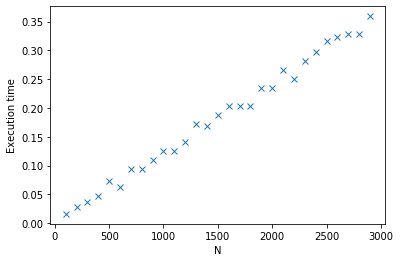

In [8]:
import time
numbers=np.arange(100)
times=[]
for k in range(1,30):
    bool_list=np.array([False for i in range(100)])
    time1=time.time()
    for i in range(2,100*k):
        for j in numbers:
            if j%i==0 and j!=i:
                bool_list[j]=True
    time2=time.time()
    times.append(time2-time1)
print(numbers[bool_list==False])

plt.plot([k*100 for k in range(1,30)], times, 'x')
plt.xlabel("N")
plt.ylabel("Execution time")

#Execution time scales linearly with N
#It turns out that the algorithm I wrote is the sieve of Eratosthenes

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [9]:
rw=np.zeros((1000,200))
for i in range(1,rw.shape[1]):
    for j in range(rw.shape[0]):
        q=np.random.randint(2)*2-1
        rw[j,i]=rw[j,i-1]+q
distancies_walkers_2=rw[:,-1]**2
mean_dist=np.sqrt(np.mean(distancies_walkers_2))
print(mean_dist)

rw_random=np.random.randint(2,size=(1000,200))
rw_random=rw_random*2-1
distancies=np.sum(rw_random,axis=1)
mean_random_dist=np.sqrt(np.mean(distancies**2))
print(mean_random_dist)

14.209011225275317
14.588351517563593


Text(0, 0.5, 'mean distance')

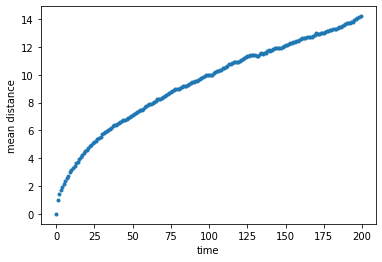

In [10]:
def average_distance(rw,ad):
    for i in range(rw.shape[1]):
        distancies_walkers_2=rw[:,i]**2
        mean_dist=np.sqrt(np.mean(distancies_walkers_2))
        ad.append(mean_dist)

ad=[]
average_distance(rw,ad)
plt.plot(range(200),ad,'.')
plt.xlabel("time")
plt.ylabel("mean distance")

Yes, I get what I expected. Firstly because the computation from the evaluation of the particle position and the one using randint() method gives the same results. Then also the plot is satisfying, because what I computed was a diffusion process, in which the mean of the distance of the particle is linearly dependent from a constant D. This is exactly what is shown in the plot.

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

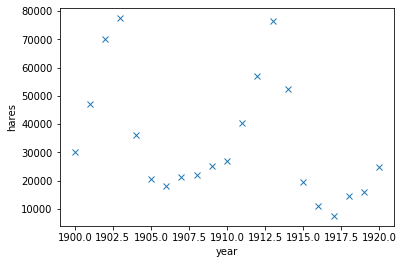

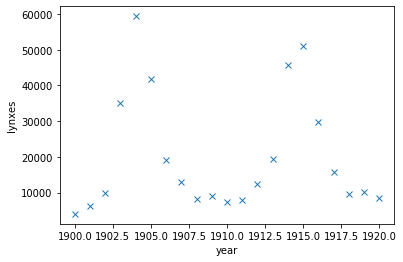

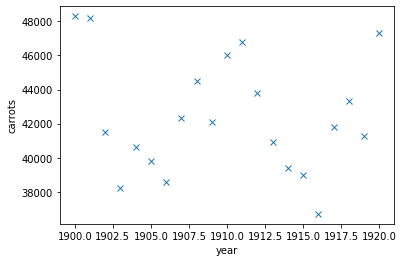

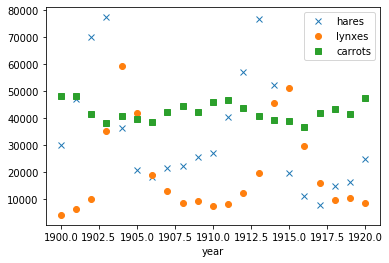

mean population of hares : 34081.0
std of population of hares : 20897.9
mean population of lynxes : 20166.7
std of population of lynxes : 16254.6
mean population of carrots : 42400.0
std of population of carrots : 3322.5

Correlation hares-lynxes : 0.07
Correlation hares-carrots : -0.02
Correlation lynxes-carrots : -0.68


In [13]:
data=np.loadtxt("populations.txt")#,allow_pickle=True)
year, hares, lynxes, carrots = data[:,0], data[:,1], data[:,2], data[:,3]

plt.plot(year,hares,'x')
plt.xlabel("year")
plt.ylabel("hares")
plt.show()
plt.plot(year,lynxes,'x')
plt.xlabel("year")
plt.ylabel("lynxes")
plt.show()
plt.plot(year,carrots,'x')
plt.xlabel("year")
plt.ylabel("carrots")
plt.show()

# here is shown a (little confusing) plot which however shows well the delay from hares-population increase and lynxes-population increase
plt.plot(year,hares,'x',label='hares')
plt.plot(year,lynxes,'o',label='lynxes')
plt.plot(year,carrots,'s',label='carrots')
plt.xlabel("year")
plt.legend(loc='best')
plt.show()

print("mean population of hares : %.1f" %np.mean(hares))
print("std of population of hares : %.1f" %np.std(hares))
print("mean population of lynxes : %.1f" %np.mean(lynxes))
print("std of population of lynxes : %.1f" %np.std(lynxes))
print("mean population of carrots : %.1f" %np.mean(carrots))
print("std of population of carrots : %.1f" %np.std(carrots))

corr_matrix_hl=np.corrcoef(hares,lynxes)
corr_matrix_hc=np.corrcoef(hares,carrots)
corr_matrix_lc=np.corrcoef(lynxes,carrots)
print("\nCorrelation hares-lynxes : %.2f" %corr_matrix_hl[1,0])
print("Correlation hares-carrots : %.2f" %corr_matrix_hc[1,0])
print("Correlation lynxes-carrots : %.2f" %corr_matrix_lc[1,0])

From the plots we observe a clear dependency from hares and lynxes population, and also a less clear dependence from carrots and the two species of animals population. However, when we compute the Pearson correlation coefficient between hares and lynxes population, it does not show a strong dependency. This may be due to the fact that lynxes population increase approximately when hares population has come to his maximum, so the two trends are a little out of phase. Instead, lynxes and carrots population show a high negative correlation coefficient. This is due to the fact that lynxes number increase when there are lots of hares, which eat lots of carrots and this has the effect of decreasing the carrots population right when it's increasing the number of lynxes.